In [7]:
import numpy as np
import matplotlib.pyplot as plt

from nopt.transforms import *
from nopt.constraints import *
from nopt.problems import *
from nopt.solvers import *
from nopt.tests import *

from scipy.linalg import hadamard

In [8]:
m = 100
n = 100
rho_r = 0.1
rho_s = 0.1
delta = 0.5

p = round(delta*m*n)
s = round(rho_s*p)
alpha = s/(m*n)
r = round(.5*( m+n - np.sqrt( (m+n)**2 - 4*rho_r*p ) ))

In [9]:
l0, s0 = GenerateLSMat1((m,n), r, s, 1)
x0 = l0 + s0
HTr = FixedRank(r)
HTs = Sparsity(s)

# Amat = np.random.normal(0,1, (p,m*n)) / np.sqrt(m*n)
# A = LinearMatrix(Amat, shape_input = (m,n))
#Amat = hadamard(m*n)
#Amat = Amat[1:p,:] / np.sqrt(m*n)
#A = LinearMatrix(Amat[1:p,:], shape_input = (m,n))
A = FastJLT(shape_input = (m,n), shape_output= (p,1))
b = A.matvec(x0)

In [10]:
solver = NAHT(logverbosity = 2, maxiter = 5000)
problem = LinearProblemSum(A, b, (HTr, HTs))

In [11]:
x, opt_log = solver.solve(problem)

 iter		   obj. value	    grad. norm
 iter		   cost val	    grad. norm
    1	+2.2871035779547381e+02	5.14843667e+00
    2	+1.0501442187359291e+02	3.52323995e+00
    3	+6.4057865197587745e+01	2.72578520e+00
    4	+4.1119597641941688e+01	2.19746397e+00
    5	+2.8580344289764895e+01	1.76366519e+00
    6	+1.9707777138023580e+01	1.46395335e+00
    7	+1.3441940220831514e+01	1.23148282e+00
    8	+9.1195141576058223e+00	1.01032267e+00
    9	+6.2053794045328541e+00	8.37401073e-01
   10	+4.1756425553945160e+00	6.89888465e-01
   11	+2.7868377563184468e+00	5.56024953e-01
   12	+1.8308071646356519e+00	4.63865056e-01
   13	+1.1959034105277999e+00	3.76895259e-01
   14	+7.7364906214352713e-01	3.10584086e-01
   15	+4.9008302375765289e-01	2.52776423e-01
   16	+3.2079211528691198e-01	1.99225537e-01
   17	+2.0083705194301807e-01	1.62971536e-01
   18	+1.1954330299315791e-01	1.31524149e-01
   19	+7.1029758036435284e-02	1.00159349e-01
   20	+4.3044406709557753e-02	7.73132283e-02
   21	+2.5512380937650809e-02	

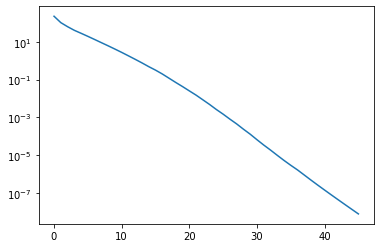

In [12]:
plt.semilogy(opt_log['iterations']['fx'])